In [1]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import sidetable as stb

## Background information


banking has been around since long time according to World banks (https://www.worldbank.org.ro/about-banks-history#:~:text=Earliest%20Banking%20Systems,trades%20that%20were%20being%20made. 


The oldest bank started around before 8000 BC, as of today more and more people use the banking system to do transaction, save money, and etc. However as more people use the banking system there are more fraud cases in the banking system, according to https://www.statista.com/statistics/872716/uk-issued-credit-and-debit-cards-number-of-fraud-cases/, the number of fraud cases goes up year by year.

In this notebook, we're doing an exploratory data analysis on fraud bank cases, and  trying to predict fraud bank cases using machine learning based on the dataset that's available in kaggle https://www.kaggle.com/ntnu-testimon/paysim1

### Problem


- Fraud Cases in bank has been on a rise from year to year
    - https://www.statista.com/statistics/872716/uk-issued-credit-and-debit-cards-number-of-fraud-cases/



- Fraud Cases has inflicted financial lost to customer and to the bank itself
    - Fraud cases has hurt customer trust towards banks

### Goals & Business Questions

- Findout the pattern in the fraudulent transaction
    - what are the type of fraud transaction ?
    - How to differentiate a regular transaction to fraud transaction?
    - When does fraud transaction usually happened ?
    

- Findout What model of machine learning that's the best recall score to predict a fraud transaction
    - What is the best machine learning model to predict fraud transaction


# Explanation For Each Columns

- Step : A unit of time in real world. In this case 1 step is 1 hour
- Type : Type of Transfer
- Amount : Amount of transaction in local currency
- NameOrig : Unique Customer ID who started the transaction
- OldbalanceOrg : Initial Balance Before the transfer 
- NewBalanceOrg : Balance After the trancsaction
- nameDesst : Recipient ID of the transaction 
- OldbalanceDest : Initial Balance of the recepient
- newbalanceDest : Recipient Balance after Transaction
- isFraud : Identifies is a fraudulent transaction or not
- isFlaggedFraud : flags illegal attempt to transfer more than 200.000 in a  single transaction

In [2]:
df = pd.read_csv('C:/Users/teguh/Purwadhika/Machine Learning/Supervised Learning/Classification/Transfer Fraud/transfer.csv')

### Basic Understanding of the data

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.info()

# certain  object data needs to be converted before we proceed for machine learning process

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.describe()

# the longest transaction takes about 743 hours 
# the highest transaction is amount is more than 92 million, which is a very high amount for digital transaction

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


# Sampling

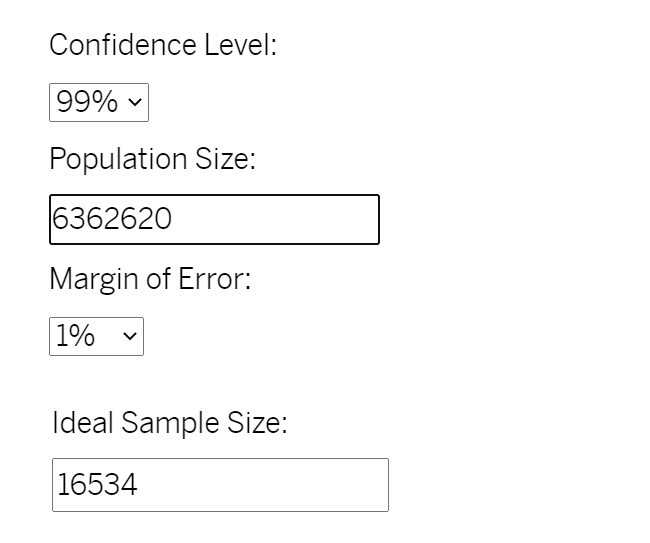




**Stratified Sampling Formula**


\begin{equation}
GSS = \frac{GP}{TP} * IdealSampleSize
\end{equation}


**GSS = Group Sample Size**


**GP = Group Population**


**TP = Total Population**

In [6]:
# this is the formula for using stratified sampling 

(len(df[df['isFraud'] == 1]) / len(df.index)) * 16534

21.342425290210635

In [7]:
16534 / len(df.index)

# From the sample size calculator we only need to use 0.00259(0.0026) after rounding out of total dataframe

0.002598615035944312

In [8]:
## using this sample size calculator https://www.qualtrics.com/blog/calculating-sample-size/
## with confidence level of 99%
## population size of 6362620
## and margin of error of 1 % 
# the ideal sample size for this population is 16534

# for this i will be using 10 % of the data as a sample 

sample_df = df.groupby('isFraud').apply(lambda x: x.sample(frac=0.0026))


In [9]:
len(df[df['isFraud'] == 1]) / len(df.index)

0.001290820448180152

In [10]:
len(sample_df[sample_df['isFraud'] == 1]) / len(sample_df.index)

0.0012694958287994198

In [11]:
len(df[df['isFlaggedFraud'] == 1])

# total isFlagged Fraud in the original dataset is superlow

16

In [12]:
len(sample_df[sample_df['isFlaggedFraud'] == 1]) / len(sample_df.index)

0.0

### Result After Sampling and Before Sampling have the same Fraud to non Fraud Ratio

so we will continue to use the sampling dataframe because it's not scallable to use a 6 million data frame in local drive


In [13]:
sample_df['isFraud'].value_counts()

0    16521
1       21
Name: isFraud, dtype: int64

In [14]:
df.stb.freq(['isFraud'], cum_cols=False)

# ini data sebelom di sampling

,isFraud,count,percent
0,0,6354407,99.870918
1,1,8213,0.129082


In [15]:
sample_df.reset_index(inplace = True, drop =True)


In [16]:
sample_df.stb.freq(['isFraud'], cum_cols = False)

##setelah di sampling

,isFraud,count,percent
0,0,16521,99.87305
1,1,21,0.12695


In [17]:
sample_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,324,PAYMENT,8009.78,C237401464,0.0,0.00,M1234786726,0.00,0.00,0,0
1,311,CASH_IN,105270.39,C1429502341,10381.0,115651.39,C1869603829,640562.22,535291.82,0,0
2,138,PAYMENT,3247.69,C810948412,176485.0,173237.31,M111656864,0.00,0.00,0,0
3,140,PAYMENT,6342.94,C877874215,2052.0,0.00,M553632399,0.00,0.00,0,0
4,326,CASH_OUT,197719.88,C1547693233,43120.0,0.00,C232364645,3218269.74,3415989.62,0,0


In [18]:
sample_df['type'].unique()

# the unique type still the same after sampling

array(['PAYMENT', 'CASH_IN', 'CASH_OUT', 'TRANSFER', 'DEBIT'],
      dtype=object)

In [19]:
sample_df.describe()

# there is no flagged fraud transaction in the sample dataset because there's suprisingly low number of isFlaggedfraud in the original dataset as well
# there might be an outlier in the step columns as we look from the min and the max there's a big range
# the highest transaction amount is 33 million
# the longest time to do a transaction is 736 hour or 30 days



,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,16542.000000,1.654200e+04,1.654200e+04,1.654200e+04,1.654200e+04,1.654200e+04,16542.000000,16542.0
mean,243.561299,1.754633e+05,8.345125e+05,8.559784e+05,1.107445e+06,1.222981e+06,0.001269,0.0
std,143.658525,5.187990e+05,2.888626e+06,2.924889e+06,3.502472e+06,3.661595e+06,0.035608,0.0
min,1.000000,3.500000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,155.000000,1.345320e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,239.000000,7.568908e+04,1.415050e+04,0.000000e+00,1.317005e+05,2.065753e+05,0.000000,0.0
75%,346.000000,2.072785e+05,1.081692e+05,1.521093e+05,9.192327e+05,1.094725e+06,0.000000,0.0
max,734.000000,2.755375e+07,3.233755e+07,3.243575e+07,1.361499e+08,1.357743e+08,1.000000,0.0


In [20]:
sample_df.describe(include = 'O')

# majority of the transaction is cash out (1/3 of the dataset) sample dataset

,type,nameOrig,nameDest
count,16542,16542,16542
unique,5,16542,16338
top,CASH_OUT,C321645560,C727103798
freq,5845,1,3


In [21]:
## taking a look at our target variable 
## fraud transaction here

sample_df[sample_df['isFraud'] == 1]

# we can already see a pattern for the sample dataset that is fraud
# 21 out of 21 fraud transaction, the amount of transaction is equal to the entire balance of a person bank acc
# or we could say 100 % of fraud transaction happened when a person emptied their entire bank acc

# * note sample

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
16521,474,CASH_OUT,87167.88,C817565031,87167.88,0.0,C2032615769,421005.27,508173.15,1,0
16522,649,TRANSFER,177429.18,C1351652548,177429.18,0.0,C1346465513,0.00,0.00,1,0
16523,692,CASH_OUT,6856104.02,C359146196,6856104.02,0.0,C948690681,751321.25,7607425.27,1,0
16524,680,CASH_OUT,272716.64,C1588399421,272716.64,0.0,C664179089,1019542.34,1292258.98,1,0
16525,150,CASH_OUT,1335959.76,C863602835,1335959.76,0.0,C1595218853,73654.55,1409614.31,1,0
16526,362,TRANSFER,1139165.57,C828020985,1139165.57,0.0,C2065608692,0.00,0.00,1,0
16527,234,TRANSFER,450489.27,C1996228335,450489.27,0.0,C1717483604,0.00,0.00,1,0
16528,726,TRANSFER,54584.29,C181783158,54584.29,0.0,C1857371794,0.00,0.00,1,0
16529,500,CASH_OUT,21832.43,C1802633720,21832.43,0.0,C1187210067,36801.19,58633.62,1,0
16530,270,TRANSFER,1998327.96,C1905022556,1998327.96,0.0,C279654004,0.00,0.00,1,0


### Data Cleaning and outliers handling process


the sample dataframe we're going to use it for machine learning process for the EDA process we're going to use the original dataset

In [120]:
df.columns = df.columns.str.lower()

# turning all the columns into lower case just because of preferences 

In [121]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameorig        object 
 4   oldbalanceorg   float64
 5   newbalanceorig  float64
 6   namedest        object 
 7   oldbalancedest  float64
 8   newbalancedest  float64
 9   isfraud         int64  
 10  isflaggedfraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [122]:
### checking the null value

df.isna().sum()

# there's no null value in this dataset 

step              0
type              0
amount            0
nameorig          0
oldbalanceorg     0
newbalanceorig    0
namedest          0
oldbalancedest    0
newbalancedest    0
isfraud           0
isflaggedfraud    0
dtype: int64

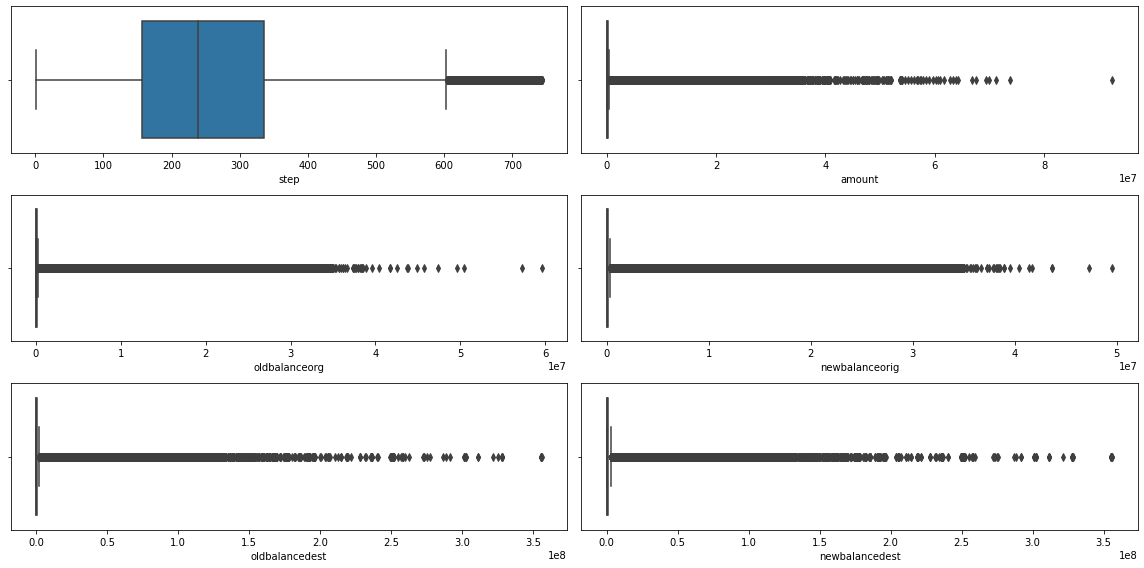

In [123]:
## checking outliers in this dataset

check_outliers = df[['step', 'amount', 'oldbalanceorg', 'newbalanceorig','oldbalancedest','newbalancedest']]

x = 1


plt.figure(figsize = (16, 8))
for column in check_outliers.columns:
    plt.subplot(3,2,x)
    sns.boxplot(check_outliers[column])
    x+=1
    
plt.tight_layout()

# we can see that there is a lot of outliers here as a normal data we would expect from a bank 
# there's some low amount of transaction and there are some high amount 
# there's some approach we can do for the step we can turn it into day instead of hour
# or we could  turn step from hour of month to hour of day

In [126]:
df.head()

,step,type,amount,nameorig,oldbalanceorg,newbalanceorig,namedest,oldbalancedest,newbalancedest,isfraud,isflaggedfraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Feature Engineering For EDA 

In [133]:
# turning step from month hour to day hour

df['step'] = df['step'] % 24
df.head()

,step,type,amount,nameorig,oldbalanceorg,newbalanceorig,namedest,oldbalancedest,newbalancedest,isfraud,isflaggedfraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Exploratory Data Analysis 


#### Univariate Analysis

In [134]:
# since our target is to understand fraud transaction and 
# there are only small number of population of fraud transaction we're going to subset the dataframe
# into fraud and non fraud transaction

df_fraud = df[df['isfraud'] == 1]
df_non_fraud = df[df['isfraud'] == 0]

df.stb.freq(['isfraud'], cum_cols=False)

# the data is imbalance later on before the machine learning process the data needs to be oversampled

,isfraud,count,percent
0,0,6354407,99.870918
1,1,8213,0.129082


#### Descriptive Statistic

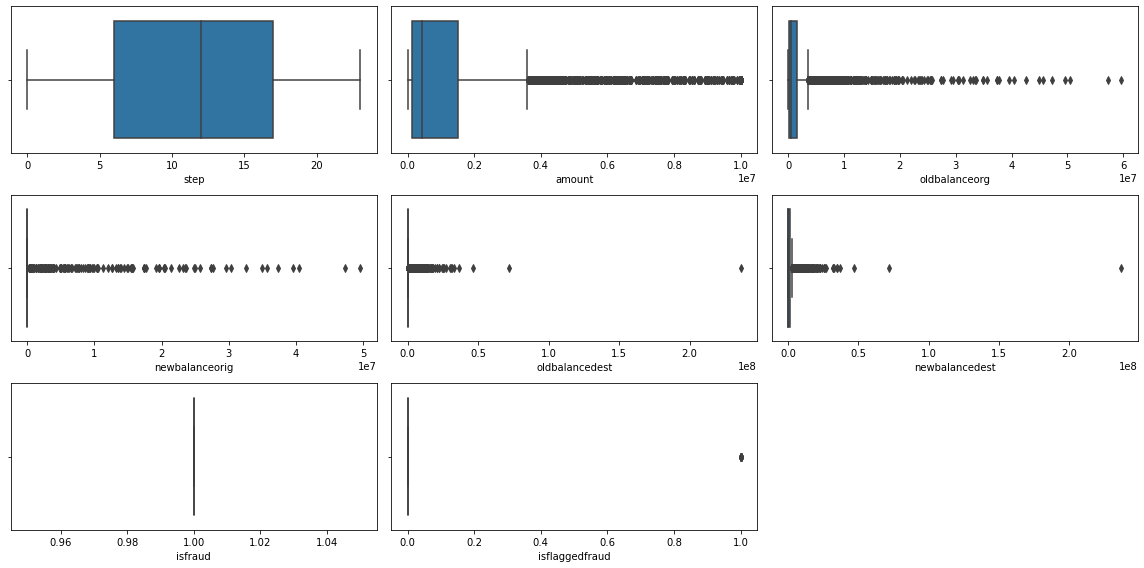

In [135]:
x = 1

plt.figure(figsize = (16, 8))
for column in df_fraud.describe().columns:
    plt.subplot(3,3,x)
    sns.boxplot(df_fraud[column])
    x+=1
    
plt.tight_layout()

In [136]:
df_fraud.describe()

# 
# the median amount of fraud transaction is around 44.000
# almost  100 % of fraud transaction emptied their bank account
# fraud transaction only happened from customer to customer 
# there's no transaction from customer to merchant or vice versa in fraud transaction

,step,amount,oldbalanceorg,newbalanceorig,oldbalancedest,newbalancedest,isfraud,isflaggedfraud
count,8213.000000,8.213000e+03,8.213000e+03,8.213000e+03,8.213000e+03,8.213000e+03,8213.0,8213.000000
mean,11.546451,1.467967e+06,1.649668e+06,1.923926e+05,5.442496e+05,1.279708e+06,1.0,0.001948
std,6.874612,2.404253e+06,3.547719e+06,1.965666e+06,3.336421e+06,3.908817e+06,0.0,0.044097
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000
25%,6.000000,1.270913e+05,1.258224e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000
50%,12.000000,4.414234e+05,4.389835e+05,0.000000e+00,0.000000e+00,4.676420e+03,1.0,0.000000
75%,17.000000,1.517771e+06,1.517771e+06,0.000000e+00,1.478287e+05,1.058725e+06,1.0,0.000000
max,23.000000,1.000000e+07,5.958504e+07,4.958504e+07,2.362305e+08,2.367265e+08,1.0,1.000000


In [275]:
df_non_fraud.describe()

,step,amount,oldbalanceorg,newbalanceorig,oldbalancedest,newbalancedest,isfraud,isflaggedfraud
count,6.354407e+06,6.354407e+06,6.354407e+06,6.354407e+06,6.354407e+06,6.354407e+06,6354407.0,6354407.0
mean,1.532633e+01,1.781970e+05,8.328287e+05,8.559702e+05,1.101421e+06,1.224926e+06,0.0,0.0
std,4.315387e+00,5.962370e+05,2.887144e+06,2.924987e+06,3.399202e+06,3.673816e+06,0.0,0.0
min,0.000000e+00,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
25%,1.200000e+01,1.336840e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
50%,1.600000e+01,7.468472e+04,1.406900e+04,0.000000e+00,1.333118e+05,2.148817e+05,0.0,0.0
75%,1.900000e+01,2.083648e+05,1.069695e+05,1.447307e+05,9.441446e+05,1.111975e+06,0.0,0.0
max,2.300000e+01,9.244552e+07,4.381886e+07,4.368662e+07,3.560159e+08,3.561793e+08,0.0,0.0


In [138]:
df_fraud.head()

,step,type,amount,nameorig,oldbalanceorg,newbalanceorig,namedest,oldbalancedest,newbalancedest,isfraud,isflaggedfraud
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0
251,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0
252,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0
680,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0


In [139]:
## what are the type of fraud transaction 

df_fraud.stb.freq(['type'], cum_cols=False)

# there are only 2 types of transaction which is cashout and transfer 
# there's no payment, cash_in, and debit types of transaction
# even in the original dataset there's only 2 types of transaction when it is a fraud transaction

,type,count,percent
0,CASH_OUT,4116,50.11567
1,TRANSFER,4097,49.88433


In [150]:
df_fraud.groupby('nameorig')['isfraud'].sum().sort_values(ascending = False)[0:10]

# all the fraud senders are unique 
# there's no sender that's succesfully commited multiple fraud

nameorig
C99979309      1
C164780972     1
C1627918307    1
C1628056782    1
C162812306     1
C1628562361    1
C162879753     1
C1629072698    1
C1629313873    1
C1629594935    1
Name: isfraud, dtype: int64

In [152]:
df_fraud.groupby('namedest')['isfraud'].sum().sort_values(ascending = False)[0:20]

# however there are many destination that's been in a multiple fraud case here

namedest
C935310781     2
C385133759     2
C200064275     2
C1656842502    2
C1655359478    2
C668046170     2
C1837027614    2
C967226405     2
C1601170327    2
C1827800010    2
C1013511446    2
C52390890      2
C104038589     2
C1669818195    2
C1827219533    2
C2020337583    2
C644163395     2
C1399829166    2
C643624257     2
C505532836     2
Name: isfraud, dtype: int64

In [246]:
# because from the pattren that we saw out of the sample fraud transaction is that 100 % fraud transaction
# emptied their bank account
# how many fraud transaction in the original dataset that emptied their bank account

# so there 179 fraud case out of 8213 that did not emptied their bank account
# conculison : 98 % of fraud transaction emptied their bank account

df_fraud_not_empty = df_fraud[(df_fraud['amount'] - df_fraud['oldbalanceorg']) != 0]
df_fraud_not_empty

,step,type,amount,nameorig,oldbalanceorg,newbalanceorig,namedest,oldbalancedest,newbalancedest,isfraud,isflaggedfraud
724,1,CASH_OUT,416001.33,C749981943,0.00,0.00,C667346055,102.0,9291619.62,1,0
1911,1,CASH_OUT,132842.64,C13692003,4499.08,0.00,C297927961,0.0,132842.64,1,0
4440,4,TRANSFER,10000000.00,C7162498,12930418.44,2930418.44,C945327594,0.0,0.00,1,0
14861,8,CASH_OUT,181728.11,C2102265902,0.00,0.00,C789014007,11397.0,184477.77,1,0
25875,8,TRANSFER,1078013.76,C1026280121,0.00,0.00,C277510102,0.0,970749.68,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362528,16,TRANSFER,10000000.00,C412961249,11314660.84,1314660.84,C253674970,0.0,0.00,1,0
6362576,21,TRANSFER,10000000.00,C780743034,45674547.89,35674547.89,C491519946,0.0,0.00,1,0
6362578,21,TRANSFER,10000000.00,C1111699947,35674547.89,25674547.89,C949015157,0.0,0.00,1,0
6362580,21,TRANSFER,10000000.00,C88849251,25674547.89,15674547.89,C1939028448,0.0,0.00,1,0


In [160]:
# how many fraud transaction thats been succesfully flagged
# out of 8213 fraud transaction only 16 has been sucesfully flagged as fraud 
# this seems not effective at all because it's less than 1 % has been succesfully identified as fraud 

df_fraud[df_fraud['isflaggedfraud'] == df_fraud['isfraud']]

16

In [163]:
df_non_fraud[df_non_fraud['isflaggedfraud'] != df_non_fraud['isfraud']]

# the flagged fraud has been succesfull detecting non fraud trancaction 
# since there's no false positive on flagged fraud 

,step,type,amount,nameorig,oldbalanceorg,newbalanceorig,namedest,oldbalancedest,newbalancedest,isfraud,isflaggedfraud


In [161]:
16 / 8213

0.0019481310118105442

### What time does the fraud and non fraud transaction happened

In [176]:
### Fraud transaction

display_side_by_side([df_fraud.stb.freq(['step'],cum_cols = False), df_non_fraud.stb.freq(['step'],cum_cols=False)], ['Fraud', 'Non Fraud'])

# we can see that almost all transaction are spread out evenly for fraud transaction 
# however for the non fraud transaction there are very low percentage of transaction before 9am
# the highest percentage of transaction for non fraud transaction happened during 18.00 - 20.00

,step,count,percent
0,10,375,4.565932
1,2,372,4.529405
2,8,368,4.480701
3,5,366,4.456350
4,6,358,4.358943
5,1,358,4.358943
6,17,353,4.298064
7,14,353,4.298064
8,22,351,4.273712
9,21,347,4.225009


#### Multivariate

In [140]:
# what time does the fraud transaction usually happened

df_fraud.groupby('type')['step'].mean()

# both cashout and transfer fraud usually happened at 11am

type
CASH_OUT    11.551263
TRANSFER    11.541616
Name: step, dtype: float64

In [141]:
## median amount for each transaction type 

df_fraud.groupby('type')['amount'].median()

# we can see from the fraud  that the transfer type has almost equal median amount compared to 
# cashout type 

type
CASH_OUT    435516.905
TRANSFER    445705.760
Name: amount, dtype: float64

### Visualization

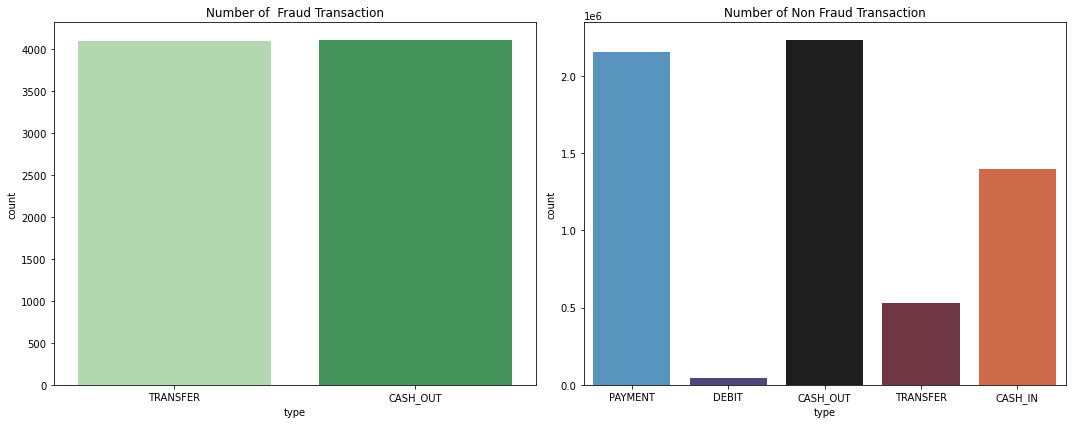

In [270]:
plt.figure(figsize = (15, 6))
plt.subplot(1,2,1)
sns.countplot(df_fraud['type'], palette = 'Greens')
plt.title('Number of  Fraud Transaction')
plt.subplot(1,2,2)
sns.countplot(df_non_fraud['type'], palette = 'icefire')
plt.title('Number of Non Fraud Transaction')

plt.tight_layout()
plt.show()

# for the non fraud transaction there are 5 types of transaction 
# compared to the fraud transaction there are only 2 types of transaction
# cashout is the most popular payment in non fraud transaction payment comes 2nd
# while debit is the least popular transaction in non fraud transaction

# for the fraud transaction transfer and cashout are the only transaction
# both types of transaction have almost similar number of transaction

Text(0.5, 1.0, 'Median non Fraud Transaction for each transfer type')

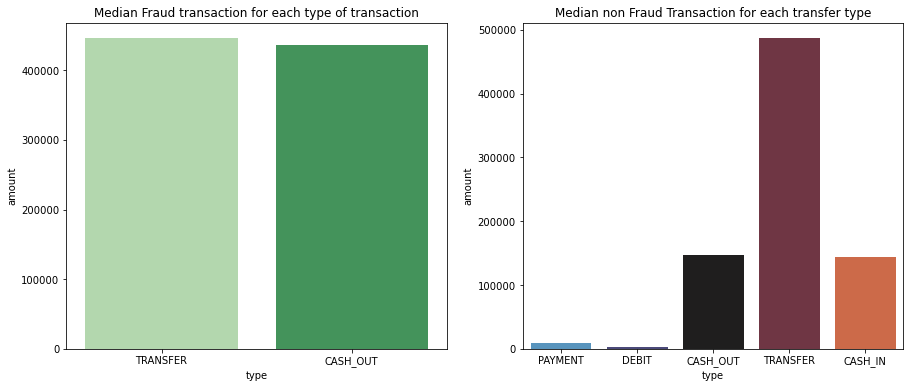

In [165]:
plt.figure(figsize = (15, 6))
plt.subplot(1,2,1)
sns.barplot(df_fraud['type'],df_fraud['amount'], estimator = np.median ,palette = 'Greens', ci = False)
plt.title('Median Fraud transaction for each type of transaction')
plt.subplot(1,2,2)
sns.barplot(df_non_fraud['type'], df_non_fraud['amount'], estimator = np.median, palette = 'icefire', ci = False)
plt.title('Median non Fraud Transaction for each transfer type')
# we can see that the median of cashout fraud transaction is similar to transfer fraud
# the median amount for non fraud transaction shows that transfer has the highest average among
# all transaction type

# the median of cashout fraud transaction is higher ccommpared to median non fraud transaction 

# there are only 2 types of transaction in fraud transaction (Cashout, transfer)
# there are 5 types of transaction in non fraud transaction

Text(0.5, 1.0, 'Non Fraud Transaction')

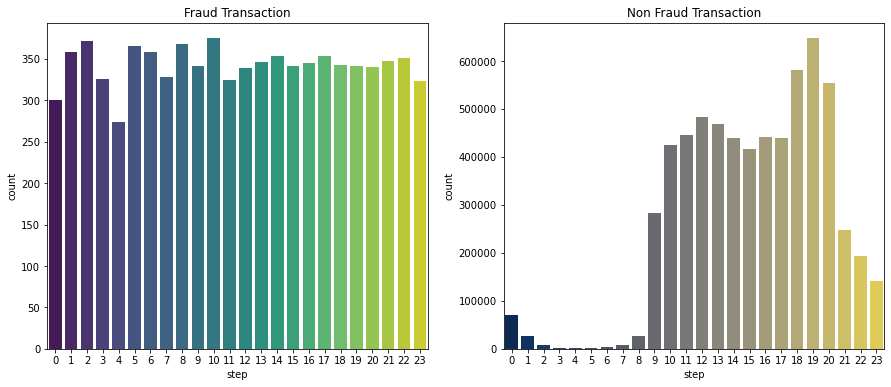

In [253]:
plt.figure(figsize = (15, 6))
plt.subplot(1,2,1)
sns.countplot(df_fraud['step'], palette = 'viridis')
plt.title('Fraud Transaction')
plt.subplot(1,2,2)
sns.countplot(df_non_fraud['step'], palette = 'cividis')
plt.title('Non Fraud Transaction')

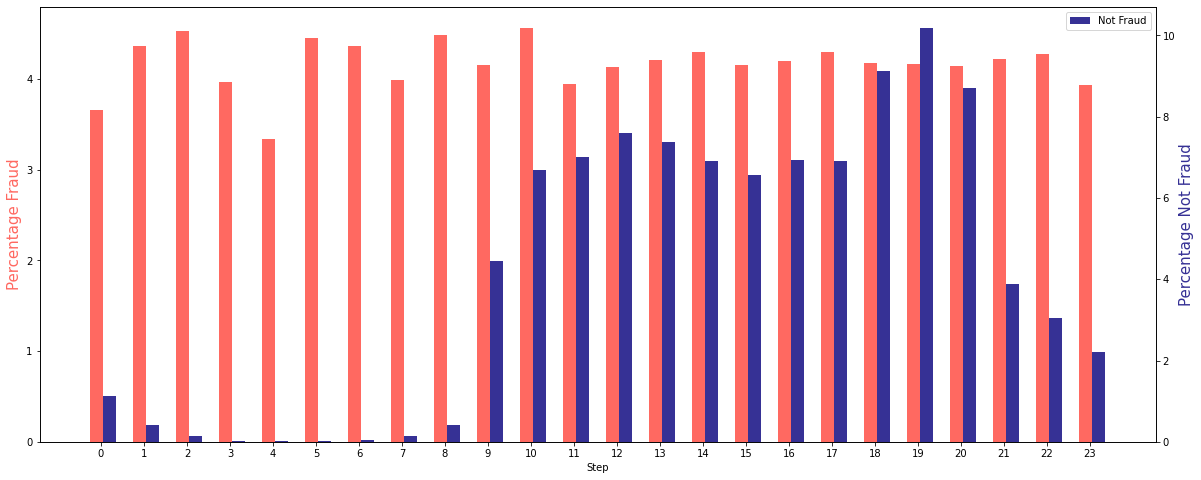

In [244]:
fraud_side_table = df_fraud.stb.freq(['step'], cum_cols=False)
non_fraud_side_table = df_non_fraud.stb.freq(['step'], cum_cols=False)


fig, ax1 = plt.subplots(figsize = (20,8))
ax2 = ax1.twinx()

ax1.bar(fraud_side_table['step'] - 0.3, fraud_side_table['percent'], color = '#ff6961',width = 0.3)
ax1.set_xlabel('Step')
ax1.set_ylabel('Percentage Fraud', color = '#ff6961', size = 15)
ax2.bar(non_fraud_side_table['step'] , non_fraud_side_table['percent'], width = 0.3, color = '#363195')

ax2.set_ylabel('Percentage Not Fraud', size = 15, color = '#363195')
ax1.set_xticks(np.arange(24) - 0.2)
ax1.set_xticklabels(np.arange(0,25))
plt.legend(['Not Fraud'])

plt.show()

# from our analysis before it shows that the fraud transaction are usually constant during any time of the day 
# the percentage of fraud transaction is somewhere from 3 - 4 % in any time of the day 
# the  highest percentage of fraud transaction happened at 10 am 

# for the non fraud transaction less than 1% of transaction between 0 - 9 am 
# and the non fraud transaction peak around 19.00
# start to goes down after 20.00

In [247]:
### Median Transaction amount per hour

In [263]:
non_fraud_step_median = df_non_fraud.groupby('step').median()
fraud_step_median = df_fraud.groupby('step').median()

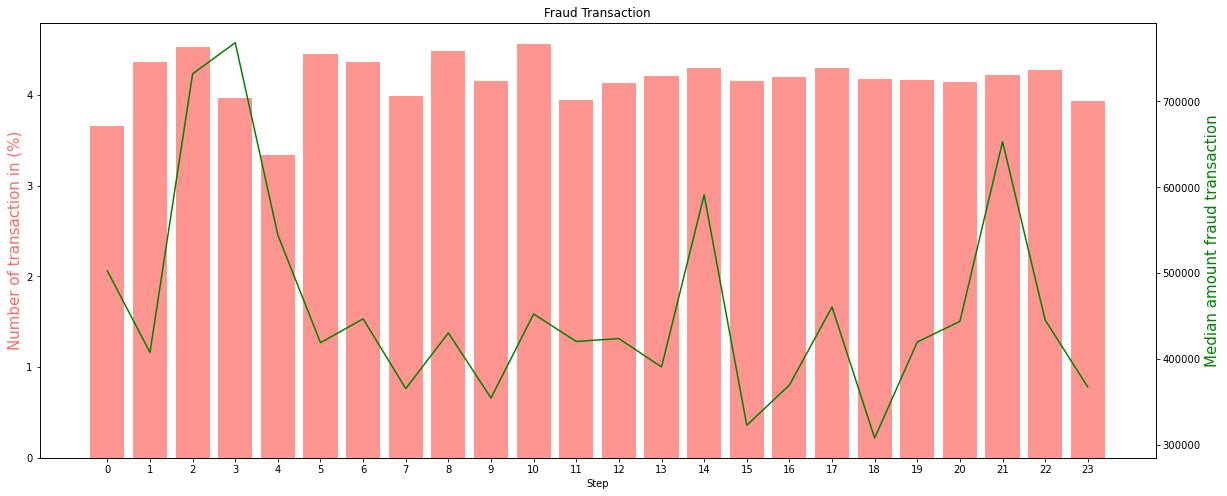

In [266]:
fig, ax1 = plt.subplots(figsize = (20,8))
ax2 = ax1.twinx()


ax1.bar(fraud_side_table['step'], fraud_side_table['percent'], color = '#ff6961', alpha = 0.7)
ax1.set_xlabel('Step')
ax1.set_ylabel('Number of transaction in (%)', color = '#ff6961', size = 15)
ax2.plot(fraud_step_median.index , fraud_step_median['amount'], color = '#008000')

ax2.set_ylabel('Median amount fraud transaction', size = 15, color = '#008000')
ax1.set_xticks(np.arange(24))
ax1.set_xticklabels(np.arange(0,25))

plt.title('Fraud Transaction')


plt.show()

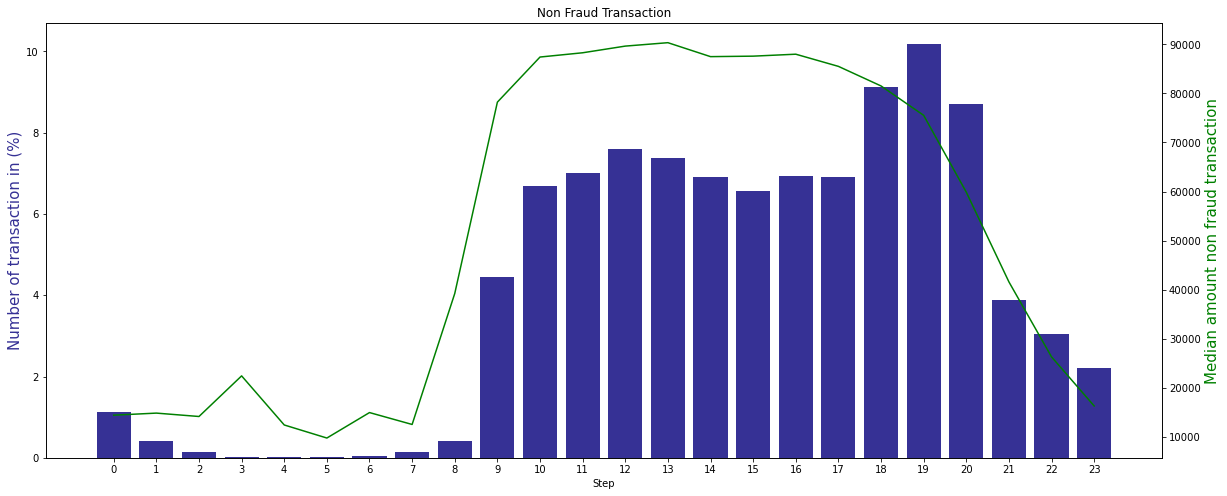

In [262]:

fig, ax1 = plt.subplots(figsize = (20,8))
ax2 = ax1.twinx()


ax1.bar(non_fraud_side_table['step'], non_fraud_side_table['percent'], color = '#363195')
ax1.set_xlabel('Step')
ax1.set_ylabel('Number of transaction in (%)', color = '#363195', size = 15)
ax2.plot(non_fraud_step_median.index , non_fraud_step_median['amount'], color = '#008000')

ax2.set_ylabel('Median amount non fraud transaction', size = 15, color = '#008000')
ax1.set_xticks(np.arange(24))
ax1.set_xticklabels(np.arange(0,25))

plt.title('Non Fraud Transaction')


plt.show()

From the two tables above we can see that fraud transaction in general has a higher median amount compared to non fraud transaction.

- **Fraud**
    - For fraud transaction the highest median amount happened at around 3am with the median value more than 700.000
    - the median value of fraud transaction is very fluctuative per hour of the day 
    - the median value of fraud transaction doesn't have any relationship with the number of fraud transaction in each step (hour) of the day
    

- **Non Fraud**
    - for non fraud transaction the highest median amount of transaction happened at around 13.00
    - for non fraud the median amount of transaction is somehow correlated with the number of transaction
    - the median amount start to goes up as the number start to goes up and it start to goes down as the number of transaction goes down
    









## EDA Conclusion, Recommendation, and Future Improvement


#### Conclusion

- There are **5 types** of transaction for non fraud transaction **(Debit, Payment, Cashout, Cashin, Transfer)**
- For fraud transaction there are only **2 types** of transaction  (**Cashout, Transfer)**
- Fraud transaction has a higher median amount compared to non fraud transaction, High amount **cashout / transfer** are types that should be watched of fraud activity
- is flagged fraud method seems doesn't work to handle fraud cases since it only can predict **16 out of 8213 fraud cases (0.02%)** of fraud cases

- **8034 out of 8213 fraud (98%) cases** emptied their bank account 


- Some fraud transaction are able to do cashout / transfer **more than their original balance**

- Some fraud transaction are able to do cashout / transfer **When the original balance is 0**


- there's no fraud transaction from **merchant to customer or customer to merchant only customer to customer**

- there are destination account that has been in **multiple fraud cases**

- the median value of fraud transaction doesn' have any correlation with the number of transaction of fraud transaction 

- or non fraud the median amount of transaction is somehow correlated with the number of transaction



#### Recommendation


- Watch out for user that has a **high amount of transfer / cashout**. since fraud transaction has a higher median value compared to the non fraud transaction, all high amount transfer / cashout should be watched closely


- Watch out for customer **who empltied their bank account** 98% of user who's involed in fraud transaction emptied their bank account in a single transaction, bank should be aware watch stop user / have an automated system to stop from someone drawing / transfering an entire bank account in a single transfer



- Use **Machine Learning to predict Fraud**, the bank already implemented a system isflaggedfraud to flagging a fraud activity, however the system failed miserablely and it only able to predict **(0.02%)** out of the entire of fraud transaction, hence using a machine learning that's focus on the recall score could help the bank to predict a fraud activity



#### Future Improvement for the notebook


- there're 2% of fraud activity that did not empty their bank account, findout the pattern of the fraud transaction that did not emptied their bank account



- **Try Using Sampling** as the data get bigger and bigger EDA could be done using a sampling method since it's resourcefully expensive to explore millions of data as the data transaction get bigger 




- **Getting date from step** our analysis we turn the step from monthly hour into daily hour, in the future step could be turned into date and daily our and from that would could understand better how a fraud transaction affected by date